# Simple Tren-Following strategy

## Background

Applying a Simple Tren-Following strategy, where trades are made based on the direction of recent price movements. In this specific case, the strategy is based on the percentage change in the OHLC (open, high, low, close) prices, with a buy signal generated if the percentage change is positive and a sell signal generated if the percentage change is negative.

---

In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path

### Read the CSV file into Pandas DataFrame

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
trading_df = pd.read_csv(
    Path("../Resources/ETHUSDT-1h-data.csv"), 
    index_col="timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
trading_df.head()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.0,301.61,125.66877,1502945999999,37684.804181,129,80.56377,24193.440789,0
2017-08-17 05:00:00,301.61,303.28,300.0,303.10,377.67246,1502949599999,114043.282676,202,328.10428,99079.803569,0
2017-08-17 06:00:00,302.40,304.44,301.9,302.68,303.86672,1502953199999,92034.441294,182,259.28668,78525.948613,0
2017-08-17 07:00:00,302.68,307.96,302.6,307.96,754.74510,1502956799999,229725.136967,198,592.43176,180297.966961,0
2017-08-17 08:00:00,307.95,309.97,307.0,308.62,150.75029,1502960399999,46559.462371,182,140.68470,43451.495398,0


### Add a daily return values column to the DataFrame

In [3]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["close"].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,actual_returns
timestamp,,,,,,,,,,,,
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,1502949599999,114043.282676,202,328.10428,99079.803569,0,0.004940
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,1502953199999,92034.441294,182,259.28668,78525.948613,0,-0.001386
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,1502956799999,229725.136967,198,592.43176,180297.966961,0,0.017444
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,1502960399999,46559.462371,182,140.68470,43451.495398,0,0.002143
2017-08-17 09:00:00,308.62,312.00,308.62,310.00,469.27879,1502963999999,145510.063225,198,438.71878,136034.157708,0,0.004472


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,actual_returns
timestamp,,,,,,,,,,,,
2023-01-23 18:00:00,1629.03,1640.49,1626.06,1628.85,26815.5440,1674500399999,4.378866e+07,34634,13907.3933,2.270701e+07,0,-0.000104
2023-01-23 19:00:00,1628.85,1630.57,1610.04,1619.88,27357.8436,1674503999999,4.432545e+07,35086,12780.9097,2.070848e+07,0,-0.005507
2023-01-23 20:00:00,1619.89,1635.26,1618.65,1634.80,13128.4739,1674507599999,2.133510e+07,21144,6794.6870,1.104395e+07,0,0.009211
2023-01-23 21:00:00,1634.80,1635.50,1629.53,1631.84,9298.6748,1674511199999,1.518002e+07,15686,4916.0862,8.025556e+06,0,-0.001811
2023-01-23 22:00:00,1631.84,1635.75,1630.90,1632.64,5790.1341,1674514799999,9.458013e+06,7167,3912.6361,6.391575e+06,0,0.000490


---

### Generating the Features and Target Sets

In [4]:
# Define a window size of 4
short_window = 4

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
trading_df["sma_fast"] = trading_df["close"].rolling(window=short_window).mean()

In [5]:
# Define a window size of 100
long_window = 100

# Create a simple moving average (SMA) using the long_window and assign this to a new columns called sma_slow
trading_df["sma_slow"] = trading_df["close"].rolling(window=long_window).mean()

In [6]:
# Drop the NaNs using dropna()
trading_df = trading_df.dropna()

#### Create the features set

In [7]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = trading_df[["sma_fast", "sma_slow"]].copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
timestamp,,
2017-08-21 08:00:00,318.2650,298.5687
2017-08-21 09:00:00,319.0750,298.7106
2017-08-21 10:00:00,318.9300,298.8959
2017-08-21 11:00:00,322.1875,299.1316
2017-08-21 12:00:00,325.3325,299.3584


,sma_fast,sma_slow
timestamp,,
2023-01-23 18:00:00,1624.6350,1614.2020
2023-01-23 19:00:00,1624.3925,1615.0699
2023-01-23 20:00:00,1628.1375,1616.0668
2023-01-23 21:00:00,1628.8425,1617.0915
2023-01-23 22:00:00,1629.7900,1618.0271


#### Create the target set

In [8]:
# Create a new column in the trading_df called signal setting its value to zero.
trading_df["signal"] = 0.0

In [9]:
# Create the signal to buy
trading_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1

In [10]:
# Create the signal to sell
trading_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [11]:
# Copy the new signal column to a new Series called y.
y = trading_df["signal"].copy()

---

### Split the Data Into Training and Testing Datasets

#### Creating the Training Datasets

In [12]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [13]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-08-21 08:00:00


In [14]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2017-11-21 08:00:00


In [15]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,sma_fast,sma_slow
timestamp,,
2017-08-21 08:00:00,318.2650,298.5687
2017-08-21 09:00:00,319.0750,298.7106
2017-08-21 10:00:00,318.9300,298.8959
2017-08-21 11:00:00,322.1875,299.1316
2017-08-21 12:00:00,325.3325,299.3584


#### Creating the Testing Datasets

In [16]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,sma_fast,sma_slow
timestamp,,
2017-11-21 08:00:00,362.4675,347.2649
2017-11-21 09:00:00,363.3325,347.6091
2017-11-21 10:00:00,365.2525,347.9616
2017-11-21 11:00:00,366.8700,348.4051
2017-11-21 12:00:00,367.3550,348.8238


#### Standardizing the Data

In [17]:
# Imports
from sklearn.preprocessing import StandardScaler

In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

### Incorporate the SVM Machine Learning Into the Trading Strategy

In [19]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [20]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [21]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.11      0.18      1081
         1.0       0.52      0.92      0.66      1122

    accuracy                           0.52      2203
   macro avg       0.53      0.51      0.42      2203
weighted avg       0.53      0.52      0.42      2203



---

### Backtesting a Machine Learning Trading Algorithm

In [22]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [23]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.86      0.63     22281
         1.0       0.51      0.14      0.22     22949

    accuracy                           0.49     45230
   macro avg       0.50      0.50      0.42     45230
weighted avg       0.50      0.49      0.42     45230



In [24]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
timestamp,,,
2017-11-21 08:00:00,1.0,0.007377,0.007377
2017-11-21 09:00:00,1.0,-0.001503,-0.001503
2017-11-21 10:00:00,1.0,0.002600,0.002600
2017-11-21 11:00:00,1.0,0.009253,0.009253
2017-11-21 12:00:00,1.0,-0.005003,-0.005003


<Axes: xlabel='timestamp'>

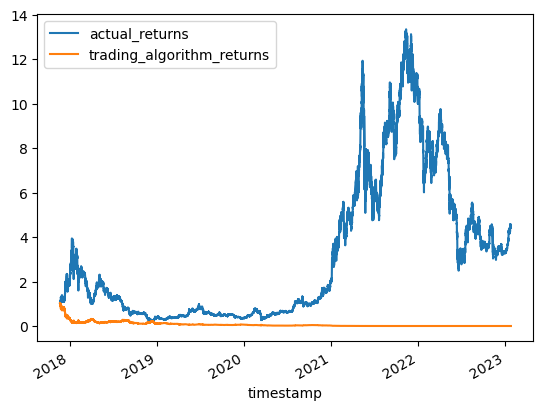

In [25]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

---

# Add a New Machine Learning Model

## Import the `LogisticRegression` model from scikit-learn.


In [26]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [27]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

## Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `LogisticRegression` model.

In [28]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

In [29]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [30]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.54      0.04      0.08      1081
         1.0       0.51      0.97      0.67      1122

    accuracy                           0.51      2203
   macro avg       0.53      0.50      0.37      2203
weighted avg       0.53      0.51      0.38      2203



## Backtest the `LogisticRegression` model using the testing data to evaluate its performance.

In [31]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [32]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.60      0.54     22281
         1.0       0.50      0.39      0.44     22949

    accuracy                           0.50     45230
   macro avg       0.50      0.50      0.49     45230
weighted avg       0.50      0.50      0.49     45230



## Compare the performance of the logistic regression and SVM models using the classification reports generated with the testing data. 

In [33]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.49      0.60      0.54     22281
         1.0       0.50      0.39      0.44     22949

    accuracy                           0.50     45230
   macro avg       0.50      0.50      0.49     45230
weighted avg       0.50      0.50      0.49     45230



In [34]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.49      0.86      0.63     22281
         1.0       0.51      0.14      0.22     22949

    accuracy                           0.49     45230
   macro avg       0.50      0.50      0.42     45230
weighted avg       0.50      0.49      0.42     45230



In [35]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["lr_predicted_signal"] = lr_testing_signal_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["lr_trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["lr_predicted_signal"]
predictions_df.head()

,lr_predicted_signal,actual_returns,lr_trading_algorithm_returns
timestamp,,,
2017-11-21 08:00:00,1.0,0.007377,0.007377
2017-11-21 09:00:00,1.0,-0.001503,-0.001503
2017-11-21 10:00:00,1.0,0.002600,0.002600
2017-11-21 11:00:00,1.0,0.009253,0.009253
2017-11-21 12:00:00,1.0,-0.005003,-0.005003


<Axes: xlabel='timestamp'>

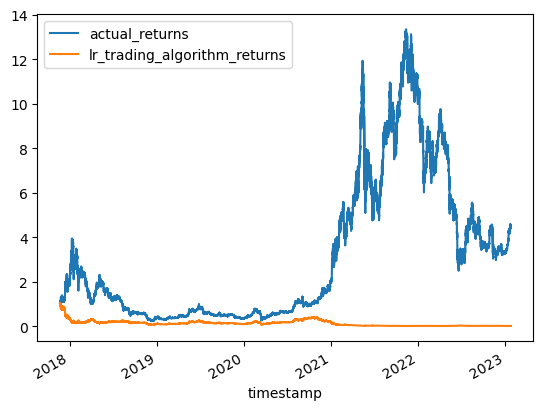

In [36]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "lr_trading_algorithm_returns"]]).cumprod().plot()

### Answer the following question:

**Question:** Did the `LogisticRegression` perform better than the `SVM`?

**Answer:** Maybe. The logistic regression model performs a bit better than the SVM model since it has a higher accuracy score. However, the SVM model does a better job predicting profitable short opportunities, as evidenced by its higher recall score on the `-1.0` class. Ultimately, which model is best may depend on which class we care most about predicting, as well as which has better overall economic returns compared to a long-only investment.

#### Create the features set

# Part 2 - Adding more Features, a test/train ratio of 40/60, and xgboost Classifier

In [37]:
from finta import TA

ohlcv_df = trading_df

# List of time periods to use for Moving Averages calculation
timeperiods = [5,7,14,20,30,50,70,100,150,200]

df = ohlcv_df.copy()

# Calculate SMAs and add them to the DataFrame
for t in timeperiods:
    sma = TA.SMA(df, t)
    ema = TA.SMA(df, t)
    atr = TA.ATR(df, t)
    adx = TA.ADX(df, t) 
    rsi = TA.RSI(df, t)
    hma = TA.HMA(df, t)
    vama = TA.VAMA(df, t)

    df[f'SMA_{t}'] = sma
    df[f'EMA_{t}'] = ema
    df[f'HMA_{t}'] = hma
    df[f'VAMA_{t}'] = vama
    df[f'ATR_{t}'] = atr
    df[f'ADX_{t}'] = adx
    df[f'RSI_{t}'] = rsi

df['UO'] = TA.UO(ohlcv_df)

# Adding Awesome Indicator (AO)
df['AO'] = TA.AO(ohlcv_df)
df['OBV'] =TA.OBV(ohlcv_df)

# Adding Chaikin Indicator 
df['CHAIKIN'] = TA.CHAIKIN(ohlcv_df)

# Adding Bollinger Bands
df[['BB_UPPER','BB_MED','BB_LOWER']] =TA.BBANDS(ohlcv_df)

### Add a daily return values column to the DataFrame

In [38]:
# Calculate the daily returns using the closing prices and the pct_change function
df["actual_returns"] = df["close"].pct_change()

# Drop all NaN values from the DataFrame
df = df.dropna()

# Review the DataFrame
df.head()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,...,ATR_200,ADX_200,RSI_200,UO,AO,OBV,CHAIKIN,BB_UPPER,BB_MED,BB_LOWER
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-09-07 04:00:00,326.59,329.31,325.41,328.32,39.14457,1504760399999,12772.602467,28,17.29839,5651.336392,...,9.65070,22.198686,49.600947,39.226059,7.769059,1004.46328,-81.843810,338.578790,326.7900,315.001210
2017-09-07 05:00:00,327.49,330.00,326.03,328.02,80.83488,1504763999999,26594.346825,85,11.62327,3825.715368,...,9.64375,22.169671,49.582670,41.051250,5.829882,923.62840,-72.216918,338.694425,326.9045,315.114575
2017-09-07 06:00:00,329.06,330.45,325.21,326.61,53.93536,1504767599999,17621.368677,42,41.78398,13666.001671,...,9.63685,22.141757,49.496516,39.227751,5.316029,869.69304,-69.400306,338.298420,327.3580,316.417580
2017-09-07 07:00:00,325.21,325.96,321.31,323.57,83.60382,1504771199999,27044.577431,92,26.08999,8464.323183,...,9.62975,22.117883,49.310855,39.487355,4.251735,786.08922,-62.534188,338.115445,327.5185,316.921555
2017-09-07 08:00:00,323.57,325.41,320.17,325.30,134.11969,1504774799999,43226.983647,107,45.89500,14827.932319,...,9.62605,22.095351,49.419367,50.645185,2.360412,920.20891,-13.625789,337.186486,327.9810,318.775514


In [39]:
# Create a new column in the trading_df called signal setting its value to zero.
df["signal"] = 0.0

# Create the signal to buy
df.loc[(df["actual_returns"] >= 0), "signal"] = 1

# Create the signal to sell
df.loc[(df["actual_returns"] < 0), "signal"] = -1

In [40]:
df["signal"].value_counts()

 1.0    23738
-1.0    23174
Name: signal, dtype: int64

---
### Dealing with Class Imbalance using Undersampling 

In [41]:
'''import pandas as pd
from sklearn.utils import resample

# Count the number of samples in each class
class_counts = df['signal'].value_counts()

# Find the class with fewer samples
minority_class = class_counts.idxmin()

# Split the dataframe into the majority and minority classes
majority_class = df[df['signal'] != minority_class]
minority_class = df[df['signal'] == minority_class]

# Undersample the majority class to match the number of samples in the minority class
undersampled_majority = resample(majority_class,
                                 replace=False,
                                 n_samples=len(minority_class),
                                 random_state=42)

# Combine the undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the rows in the balanced dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42)
'''

"import pandas as pd\nfrom sklearn.utils import resample\n\n# Count the number of samples in each class\nclass_counts = df['signal'].value_counts()\n\n# Find the class with fewer samples\nminority_class = class_counts.idxmin()\n\n# Split the dataframe into the majority and minority classes\nmajority_class = df[df['signal'] != minority_class]\nminority_class = df[df['signal'] == minority_class]\n\n# Undersample the majority class to match the number of samples in the minority class\nundersampled_majority = resample(majority_class,\n                                 replace=False,\n                                 n_samples=len(minority_class),\n                                 random_state=42)\n\n# Combine the undersampled majority class with the minority class\nbalanced_df = pd.concat([undersampled_majority, minority_class])\n\n# Shuffle the rows in the balanced dataframe\nbalanced_df = balanced_df.sample(frac=1, random_state=42)\n"

In [42]:
balanced_df = df

In [43]:
balanced_df["signal"].value_counts()

 1.0    23738
-1.0    23174
Name: signal, dtype: int64

---

### Generating the Feauture and Target Sets

In [44]:
# Create a new column in the trading_df called signal setting its value to zero.
X= balanced_df.copy()
X= X.drop(["open","high","low","close","volume","actual_returns"], axis =1).shift().dropna().copy()

#### Creating the feature set

In [45]:
X.head()

,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,sma_fast,sma_slow,signal,SMA_5,...,ATR_200,ADX_200,RSI_200,UO,AO,OBV,CHAIKIN,BB_UPPER,BB_MED,BB_LOWER
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-09-07 05:00:00,1.504760e+12,12772.602467,28.0,17.29839,5651.336392,0.0,325.4825,317.2461,1.0,326.836,...,9.65070,22.198686,49.600947,39.226059,7.769059,1004.46328,-81.843810,338.578790,326.7900,315.001210
2017-09-07 06:00:00,1.504764e+12,26594.346825,85.0,11.62327,3825.715368,0.0,327.0325,317.1645,-1.0,325.990,...,9.64375,22.169671,49.582670,41.051250,5.829882,923.62840,-72.216918,338.694425,326.9045,315.114575
2017-09-07 07:00:00,1.504768e+12,17621.368677,42.0,41.78398,13666.001671,0.0,327.3850,317.1743,-1.0,326.948,...,9.63685,22.141757,49.496516,39.227751,5.316029,869.69304,-69.400306,338.298420,327.3580,316.417580
2017-09-07 08:00:00,1.504771e+12,27044.577431,92.0,26.08999,8464.323183,0.0,326.6300,317.1700,-1.0,326.622,...,9.62975,22.117883,49.310855,39.487355,4.251735,786.08922,-62.534188,338.115445,327.5185,316.921555
2017-09-07 09:00:00,1.504775e+12,43226.983647,107.0,45.89500,14827.932319,0.0,325.8750,317.1258,1.0,326.364,...,9.62605,22.095351,49.419367,50.645185,2.360412,920.20891,-13.625789,337.186486,327.9810,318.775514


#### Creating the target set 

In [46]:
# Copy the new signal column to a new Series called y.
y = balanced_df["signal"][1:].copy()

In [47]:
X.shape

(46911, 86)

In [48]:
y.shape

(46911,)

In [49]:
y.value_counts()

 1.0    23737
-1.0    23174
Name: signal, dtype: int64

#### Splitting the data and building the testing and training set using a 40/60 ratio

In [50]:
from sklearn.model_selection import train_test_split

#splitting the data and building the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 )#, random_state=1, stratify=y)

#### Standardizing the Data

In [51]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:

# calculate the correlation matrix
corr_matrix = X.corr().abs()

# get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# get the index of the features with the lowest correlation
to_keep = [column for column in upper.columns if any(upper[column] < 0.8)]

# keep only the features with the lowest correlation
X = X[to_keep]

---

### Incorporate the xgboost Machine Learning Into the Trading Strategy

In [53]:
import xgboost as xgb
#from xgboost import xgbClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

#replace -1 by 0 as xgboost expects a boolean target vector (only 0 and 1)
y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)

# Create a xgb Classifier model
xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train_scaled, y_train)

# Use the best model to make predictions on the test data
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Calculate the accuracy and F1 score for the test data
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='micro')

# Print the results
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test F1 score: {f1:.2f}')

Test accuracy: 0.52
Test F1 score: 0.52


### Displaying ROC Curve

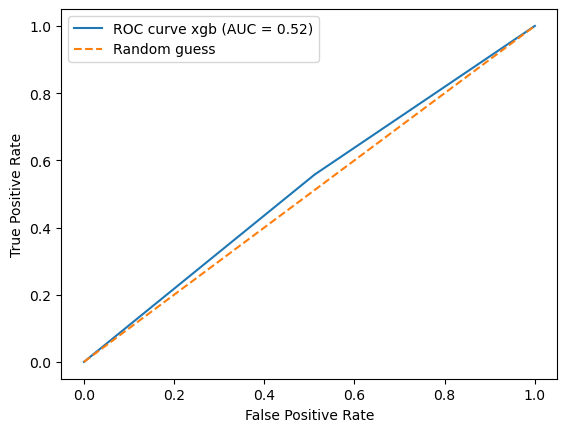

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

xgb_signal_predictions = xgb_clf.predict(X_test_scaled)

#Calculate ROC Curve
xgb_fpr, xgb_tpr, pca_thresholds = roc_curve(y_test, xgb_signal_predictions )

# Calculate the AUC 
xgb_auc = roc_auc_score(y_test, xgb_signal_predictions )

# Plot the ROC curve
plt.plot(xgb_fpr, xgb_tpr, label='ROC curve xgb (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [55]:
# Generate a classification report using the testing data and the pca model's predictions
xgb_testing_report = classification_report(y_test, xgb_signal_predictions)

# Review the testing classification report
print(xgb_testing_report)

              precision    recall  f1-score   support

         0.0       0.52      0.49      0.50      9309
         1.0       0.53      0.56      0.54      9456

    accuracy                           0.52     18765
   macro avg       0.52      0.52      0.52     18765
weighted avg       0.52      0.52      0.52     18765



In [56]:
# Create a new empty predictions DataFrame using code provided below.
xgb_predictions_df = pd.DataFrame(index=X_test.index)
xgb_predictions_df["xbg_predicted_signal"] = xgb_signal_predictions
#replace -1 by 0 as xgboost expects a boolean target vector (only 0 and 1)
#xgb_predictions_df = xgb_predictions_df.replace(0,-1)
xgb_predictions_df["actual_returns"] = df["actual_returns"]
xgb_predictions_df["xgb_trading_algorithm_returns"] = xgb_predictions_df["actual_returns"] * xgb_predictions_df["xbg_predicted_signal"]
xgb_predictions_df = xgb_predictions_df.sort_index()
xgb_predictions_df.head()

,xbg_predicted_signal,actual_returns,xgb_trading_algorithm_returns
timestamp,,,
2017-09-07 05:00:00,0,-0.000914,-0.000000
2017-09-07 08:00:00,0,0.005347,0.000000
2017-09-07 10:00:00,1,-0.001676,-0.001676
2017-09-07 11:00:00,1,0.006836,0.006836
2017-09-07 14:00:00,0,-0.001283,-0.000000


<Axes: xlabel='timestamp'>

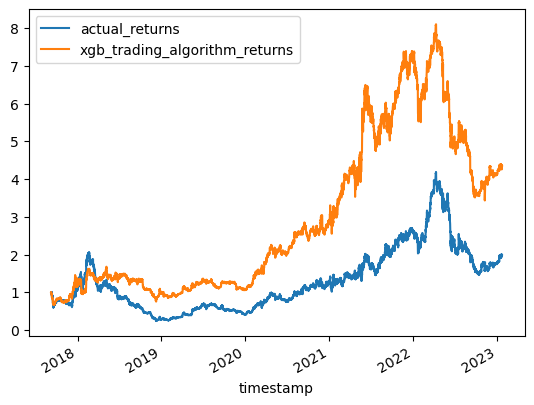

In [57]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + xgb_predictions_df[["actual_returns", "xgb_trading_algorithm_returns"]]).cumprod().plot()